In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.vector_ar.vecm import coint_johansen 

In [145]:
# Load the dataset
file_path = 'Kelompok Bersih_Cleaned.xlsx'
dataset = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(dataset.head())

   TAHUN  Produksi Minyak Bumi (juta ton)  Konsumsi Minyak Bumi (juta ton)  \
0   1967                      25746887.97                        5670000.0   
1   1968                      30322821.58                        5993000.0   
2   1969                      32410788.38                        6393000.0   
3   1970                      43113416.32                        6790000.0   
4   1971                      45031811.89                        7024000.0   

   Data GDP(USDollar)  Harga Minyak Bumi International (USDollar)  
0        5.667757e+09                                        6.36  
1        7.076465e+09                                        6.37  
2        8.337423e+09                                        5.82  
3        9.150685e+09                                        5.21  
4        9.333536e+09                                        6.92  


In [146]:
# Select the specific columns and rename for simplicity
df = dataset[['TAHUN', 'Produksi Minyak Bumi (juta ton)', 'Data GDP(USDollar)', 'Harga Minyak Bumi International (USDollar)']]
df.columns = ['Year', 'Oil_Production', 'GDP', 'Oil_Price']
df


,Year,Oil_Production,GDP,Oil_Price
0,1967,25746887.97,5.667757e+09,6.36
1,1968,30322821.58,7.076465e+09,6.37
2,1969,32410788.38,8.337423e+09,5.82
3,1970,43113416.32,9.150685e+09,5.21
4,1971,45031811.89,9.333536e+09,6.92
5,1972,54722821.58,1.099759e+10,6.83
6,1973,67547717.84,1.627325e+10,9.09
7,1974,69415629.32,2.580241e+10,29.16
8,1975,65932226.83,3.046386e+10,24.96
9,1976,76126143.85,3.726916e+10,27.48


In [147]:
# Set 'Year' as the index
df.set_index('Year', inplace=True)

# Display the first few rows of the selected columns
print(df.head())
print(df.shape)
print(df.tail())

      Oil_Production           GDP  Oil_Price
Year                                         
1967     25746887.97  5.667757e+09       6.36
1968     30322821.58  7.076465e+09       6.37
1969     32410788.38  8.337423e+09       5.82
1970     43113416.32  9.150685e+09       5.21
1971     45031811.89  9.333536e+09       6.92
(57, 3)
      Oil_Production           GDP  Oil_Price
Year                                         
2019     38158676.61  1.119100e+12      61.72
2020     36368553.24  1.059055e+12      42.14
2021     33772667.74  1.186505e+12      63.14
2022     31410349.69  1.319100e+12      87.95
2023     29042172.50  1.385715e+12      72.56


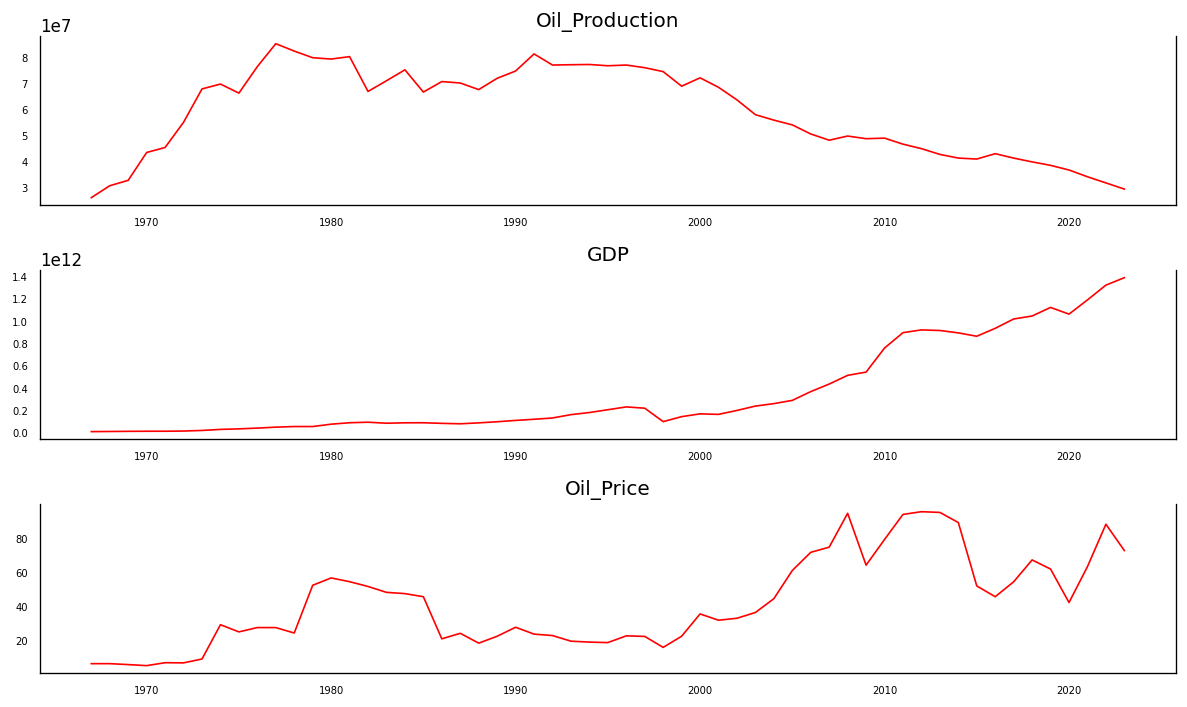

In [148]:
# Define the number of columns in the dataframe
num_columns = df.shape[1]

# Plot and visualize
fig, axes = plt.subplots(nrows=num_columns, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()
plt.show()


In [149]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)

# Rename the scaled DataFrame to df
df = df_scaled

# Display the first few rows of the scaled data
df

,Oil_Production,GDP,Oil_Price
Year,,,
1967,-1.954860,-0.856374,-1.352718
1968,-1.684370,-0.852905,-1.352336
1969,-1.560947,-0.849799,-1.373354
1970,-0.928300,-0.847796,-1.396665
1971,-0.814901,-0.847346,-1.331318
1972,-0.242052,-0.843248,-1.334757
1973,0.516046,-0.830256,-1.248392
1974,0.626460,-0.806788,-0.481424
1975,0.420552,-0.795308,-0.641926


In [150]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


grangers_causation_matrix(df, variables = df.columns) 

c:\Users\reinh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\reinh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\reinh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\reinh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\reinh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warni

,Oil_Production_x,GDP_x,Oil_Price_x
Oil_Production_y,1.0000,0.0,0.0001
GDP_y,0.0076,1.0,0.0101
Oil_Price_y,0.0000,0.0,1.0000


In [151]:
def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df, -1, 5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

# Perform Cointegration test
cointegration_test(df)


Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Oil_Production ::  33.4      > 24.2761   =>   True
GDP    ::  11.41     > 12.3212   =>   False
Oil_Price ::  1.52      > 4.1296    =>   False


In [152]:
nobs = 6
df_train, df_test = df[0:-nobs], df[-nobs:]
print(df_train.shape)  # (51, 5)
print(df_test.shape)   # (6, 5)


(51, 3)
(6, 3)


In [153]:
# Function to perform ADFuller test
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic': round(r[0], 4), 'pvalue': round(r[1], 4), 'n_lags': round(r[2], 4), 'n_obs': r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length=6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key, val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

# ADF Test on each time series column
for name, column in df_train.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Oil_Production" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.9779
 No. Lags Chosen       = 0
 Critical value 1%     = -3.568
 Critical value 5%     = -2.921
 Critical value 10%    = -2.599
 => P-Value = 0.2964. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.2145
 No. Lags Chosen       = 1
 Critical value 1%     = -3.571
 Critical value 5%     = -2.923
 Critical value 10%    = -2.599
 => P-Value = 0.9961. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Oil_Price" 
    -----------------------------------------------
 Null Hypothesis: Dat

In [154]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [155]:
# ADF Test on each column of 1st Differenced Dataframe
print("ADF Test on differenced data:")
for name, column in df_differenced.items():
    adfuller_test(column, name=column.name)
    print('\n')

ADF Test on differenced data:
    Augmented Dickey-Fuller Test on "Oil_Production" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.9454
 No. Lags Chosen       = 0
 Critical value 1%     = -3.571
 Critical value 5%     = -2.923
 Critical value 10%    = -2.599
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.56
 No. Lags Chosen       = 11
 Critical value 1%     = -3.616
 Critical value 5%     = -2.941
 Critical value 10%    = -2.609
 => P-Value = 0.1015. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Oil_Price" 
    -----------------------------------------------
 Null Hypothesis

In [156]:
# 3rd difference
df_differenced_2nd = df_differenced.diff().dropna()

# ADF Test on each column of 3rd Differenced Dataframe
print("ADF Test on third differenced data:")
for name, column in df_differenced_2nd.items():
    adfuller_test(column, name=column.name)
    print('\n')


ADF Test on third differenced data:
    Augmented Dickey-Fuller Test on "Oil_Production" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.9098
 No. Lags Chosen       = 5
 Critical value 1%     = -3.593
 Critical value 5%     = -2.932
 Critical value 10%    = -2.604
 => P-Value = 0.002. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.869
 No. Lags Chosen       = 11
 Critical value 1%     = -3.621
 Critical value 5%     = -2.944
 Critical value 10%    = -2.61
 => P-Value = 0.3468. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Oil_Price" 
    -----------------------------------------------
 Null Hy

In [157]:
# 3rd difference (if needed)
df_differenced_3rd = df_differenced_2nd.diff().dropna()

# ADF Test on each column of 3rd Differenced Dataframe
print("ADF Test on third differenced data:")
for name, column in df_differenced_3rd.items():
    adfuller_test(column, name=column.name)
    print('\n')

ADF Test on third differenced data:
    Augmented Dickey-Fuller Test on "Oil_Production" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.5127
 No. Lags Chosen       = 6
 Critical value 1%     = -3.601
 Critical value 5%     = -2.935
 Critical value 10%    = -2.606
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.845
 No. Lags Chosen       = 9
 Critical value 1%     = -3.616
 Critical value 5%     = -2.941
 Critical value 10%    = -2.609
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Oil_Price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit roo

In [158]:
model = VAR(df_differenced_3rd)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -5.419802644366857
BIC :  -4.947424533291949
FPE :  0.004433506863051363
HQIC:  -5.242043587853845 

Lag Order = 2
AIC :  -6.215524834910228
BIC :  -5.38071028433912
FPE :  0.0020125000760078692
HQIC:  -5.902798300847856 

Lag Order = 3
AIC :  -6.457256009851056
BIC :  -5.252814350004177
FPE :  0.0016049960684689434
HQIC:  -6.0082522521165 

Lag Order = 4
AIC :  -6.510413680569688
BIC :  -4.928972868687593
FPE :  0.0015711479267625295
HQIC:  -5.923939188768536 

Lag Order = 5
AIC :  -6.587106400786059
BIC :  -4.621115573965338
FPE :  0.001542173017825637
HQIC:  -5.862109743266732 

Lag Order = 6
AIC :  -7.059512966268729
BIC :  -4.701247055741299
FPE :  0.0010619380026112497
HQIC:  -6.195115239182837 

Lag Order = 7
AIC :  -6.833829415292043
BIC :  -4.075396332304621
FPE :  0.001569097965915062
HQIC:  -5.829360172130356 

Lag Order = 8
AIC :  -7.152538302401622
BIC :  -3.9858893259379915
FPE :  0.0014981457592938402
HQIC:  -6.007578023789484 

Lag Order = 9
AIC :  

c:\Users\reinh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [159]:
# An alternate method to choose the order(p) of the VAR models is to use 
# the model.select_order(maxlags) method. The selected order(p) is the 
# order that gives the lowest ‘AIC’, ‘BIC’, ‘FPE’ and ‘HQIC’ scores.
x = model.select_order(maxlags=5)
x.summary()

,AIC,BIC,FPE,HQIC
0,-4.156,-4.033,0.01568,-4.110
1,-5.267,-4.776,0.005166,-5.086
2,-6.061,-5.201*,0.002353,-5.744
3,-6.369,-5.140,0.001760,-5.915*
4,-6.484,-4.887,0.001620,-5.895
5,-6.587*,-4.621,0.001542*,-5.862


In [160]:
import pandas as pd

# Nilai AIC, BIC, FPE, dan HQIC untuk setiap model
results = {
    'Lag': [0, 1, 2, 3, 4, 5],
    'AIC': [-4.156, -5.267, -6.061, -6.369, -6.484, -6.587],
    'BIC': [-4.033, -4.776, -5.201, -5.140, -4.887, -4.621],
    'FPE': [0.01568, 0.005166, 0.002353	, 0.001760, 0.001620, 0.0015422],
    'HQIC': [-4.110, -5.086, -5.744, -5.915, -5.895, -5.862]
}

df_results = pd.DataFrame(results)

# Menentukan model dengan nilai minimum untuk setiap kriteria
best_aic = df_results.loc[df_results['AIC'].idxmin()]
best_bic = df_results.loc[df_results['BIC'].idxmin()]
best_fpe = df_results.loc[df_results['FPE'].idxmin()]
best_hqic = df_results.loc[df_results['HQIC'].idxmin()]

print("Best model based on AIC:")
print(best_aic)
print("\nBest model based on BIC:")
print(best_bic)
print("\nBest model based on FPE:")
print(best_fpe)
print("\nBest model based on HQIC:")
print(best_hqic)

Best model based on AIC:
Lag     5.000000
AIC    -6.587000
BIC    -4.621000
FPE     0.001542
HQIC   -5.862000
Name: 5, dtype: float64

Best model based on BIC:
Lag     2.000000
AIC    -6.061000
BIC    -5.201000
FPE     0.002353
HQIC   -5.744000
Name: 2, dtype: float64

Best model based on FPE:
Lag     5.000000
AIC    -6.587000
BIC    -4.621000
FPE     0.001542
HQIC   -5.862000
Name: 5, dtype: float64

Best model based on HQIC:
Lag     3.00000
AIC    -6.36900
BIC    -5.14000
FPE     0.00176
HQIC   -5.91500
Name: 3, dtype: float64


In [161]:
# Menampilkan hasil dalam bentuk tabel
summary = pd.DataFrame({
    'Criteria': ['AIC', 'BIC', 'FPE', 'HQIC'],
    'Lag': [best_aic['Lag'], best_bic['Lag'], best_fpe['Lag'], best_hqic['Lag']],
    'Value': [best_aic['AIC'], best_bic['BIC'], best_fpe['FPE'], best_hqic['HQIC']]
})

print("\nSummary of best models based on different criteria:")
print(summary)


Summary of best models based on different criteria:
  Criteria  Lag     Value
0      AIC  5.0 -6.587000
1      BIC  2.0 -5.201000
2      FPE  5.0  0.001542
3     HQIC  3.0 -5.915000


In [162]:
model_fitted = model.fit(5)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 24, Jun, 2024
Time:                     17:12:30
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -4.62112
Nobs:                     43.0000    HQIC:                  -5.86211
Log likelihood:           6.57972    FPE:                 0.00154217
AIC:                     -6.58711    Det(Omega_mle):     0.000597011
--------------------------------------------------------------------
Results for equation Oil_Production
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    -0.001032         0.048988           -0.021           0.983
L1.Oil_Production        -1.393065         0.183495           -7.592           0.000
L1.GDP                    0.367156 

In [163]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

Oil_Production : 2.09
GDP : 2.27
Oil_Price : 2.18


In [164]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

5


array([[-0.13111326, -0.01316513, -0.01605015],
       [-0.08291546, -0.05346405, -0.22661288],
       [-0.02260345, -0.07378427, -1.41776353],
       [ 0.12231949,  0.17490984, -0.2407523 ],
       [-0.10059037,  0.20623128,  0.3336139 ]])

In [165]:
# Number of years to forecast
years_to_forecast = 2045 - 2023 + 1  # From 2023 to 2045 inclusive

In [166]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,Oil_Production_2d,GDP_2d,Oil_Price_2d
Year,,,
2018,0.142652,-0.004301,2.375744
2019,-0.447409,-0.291134,-1.517948
2020,0.301300,-0.004095,-0.189684
2021,-0.106684,0.006664,-0.827601
2022,0.370473,0.131857,0.050896
2023,-0.263149,0.142348,1.198733


In [169]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=years_to_forecast)
future_years = pd.date_range(start='2023', periods=years_to_forecast, freq='Y').year
df_forecast = pd.DataFrame(fc, index=future_years, columns=df.columns + '_2d')

# Invert transformation to get the forecast back to original scale
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

df_results = invert_transformation(df_train, df_forecast, second_diff=True)
 
# Display the forecast results
print(df_results.loc[:, ['Oil_Production_forecast', 'GDP_forecast', 'Oil_Price_forecast']])


      Oil_Production_forecast  GDP_forecast  Oil_Price_forecast
2023                -1.014282      1.832780            3.187504
2024                -1.419629      1.743576            4.378914
2025                -1.523676      1.650277            5.380640
2026                -1.734408      1.563643            5.554764
2027                -1.574666      1.608866            5.779785
2028                -1.678074      1.796437            7.203538
2029                -1.944731      1.934067            9.320505
2030                -2.119337      1.786304           10.063648
2031                -2.232559      1.714948           10.807131
2032                -2.322188      1.706093           11.020096
2033                -2.329516      1.825254           11.933185
2034                -2.484605      1.965833           13.602795
2035                -2.642835      1.970337           14.972061
2036                -2.866707      1.853232           15.623371
2037                -2.965062      1.843

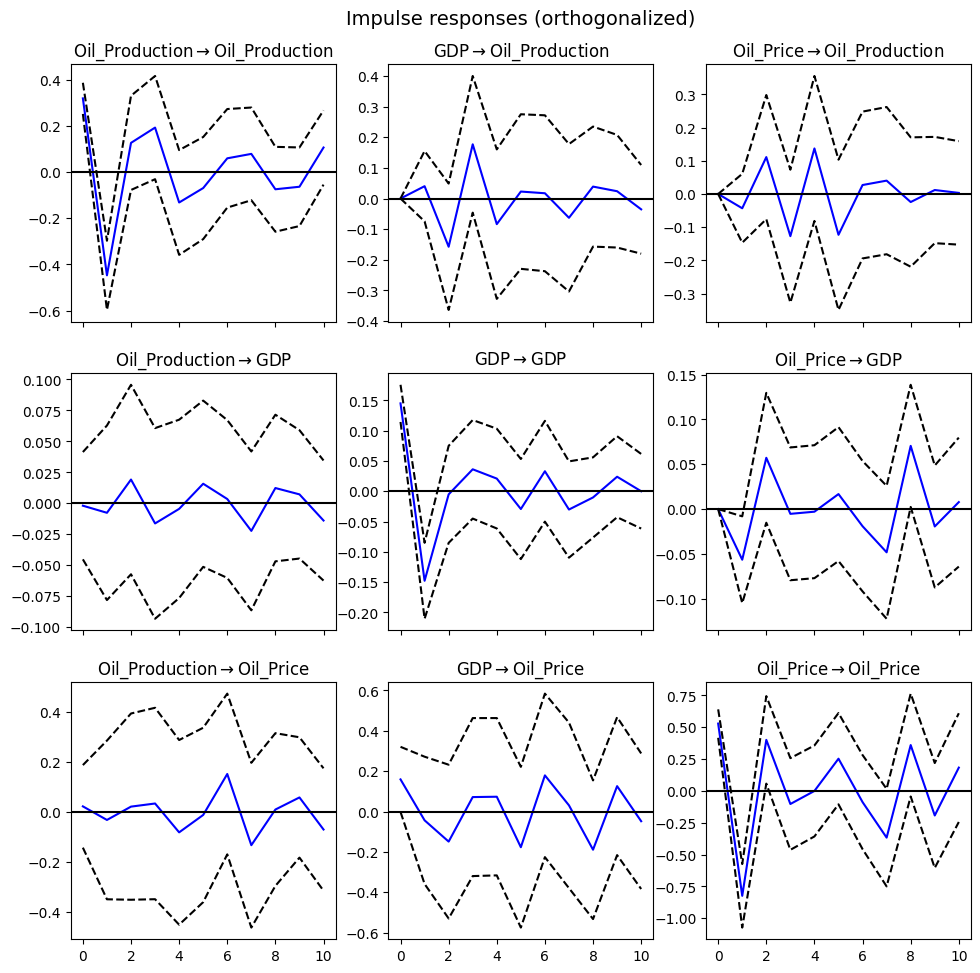

In [168]:
# Impulse Response Function (IRF) Plot
irf = model_fitted.irf(10)
irf.plot(orth=True)
plt.show()